In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [242]:
from tqdm import tqdm

# Formation Deep Learning

Les neurones sont connectées en série les unes aux autres.  
Dentrites : porte d'entrée du neurones, composé de synapses  
l'information du neurone précédent arrive dans les synapses  
signal soit inhibiteur (-1) ou excitateur (+1)  
à partir d'un certain seuil, le neurone s'active et laisse passer le signal électrique  
envoie le signal aux neurones suivants  
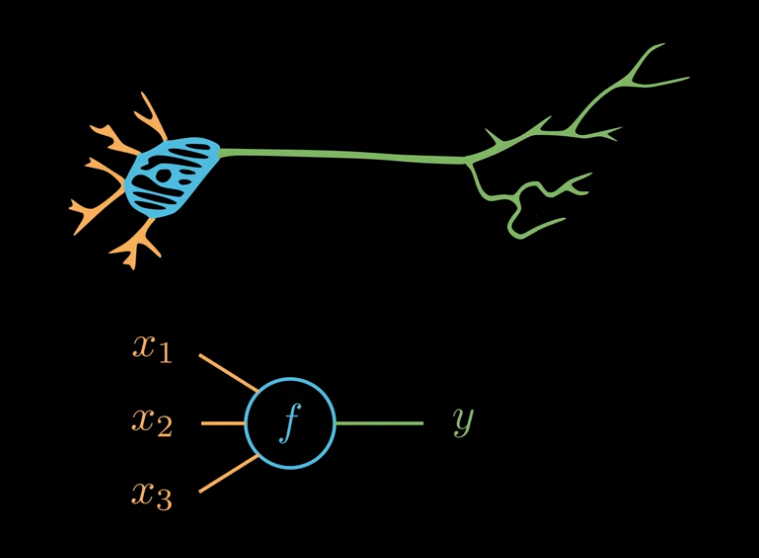

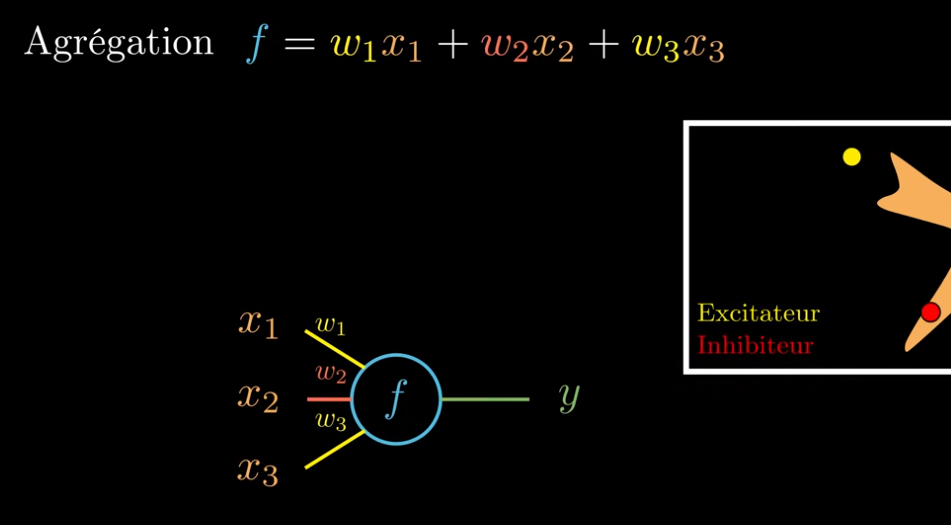

## Le Perceptron

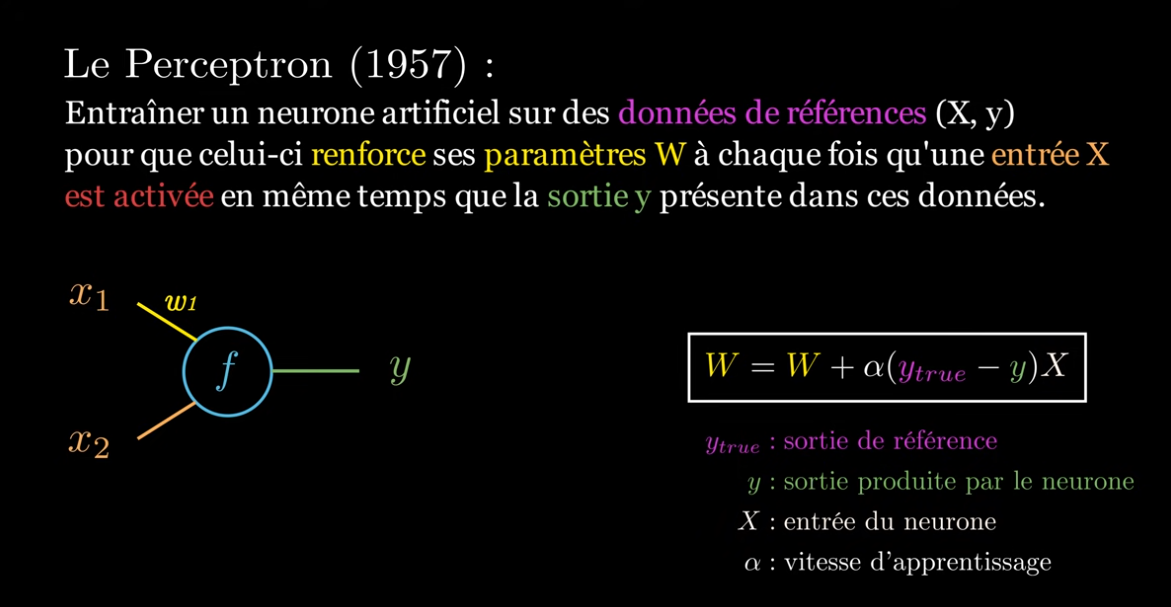

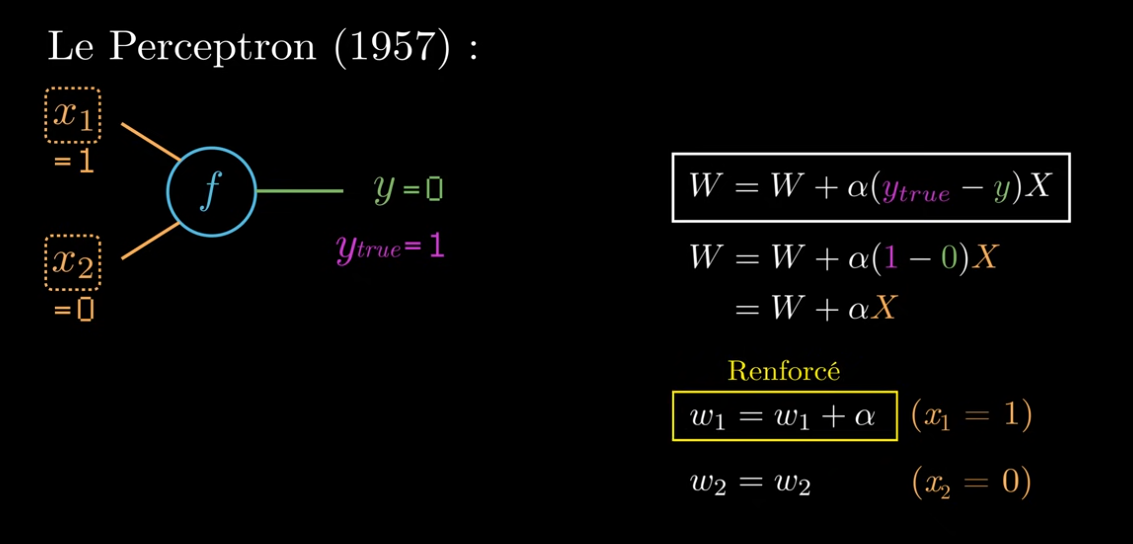

## Programme

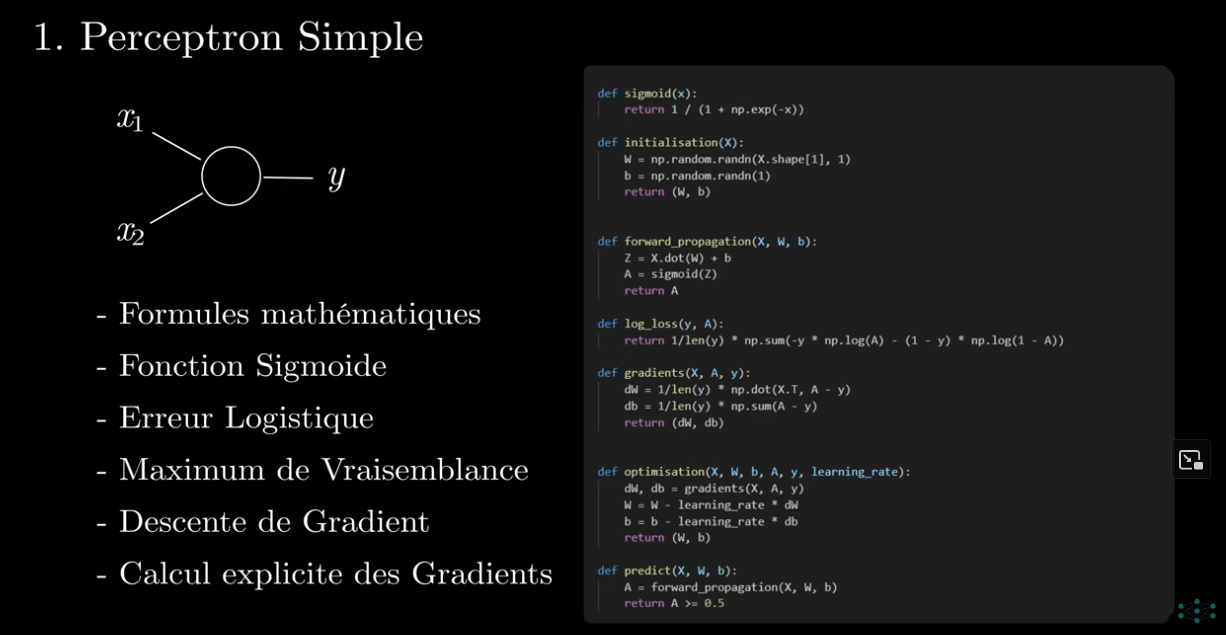

## Equations du perceptron vectorisées

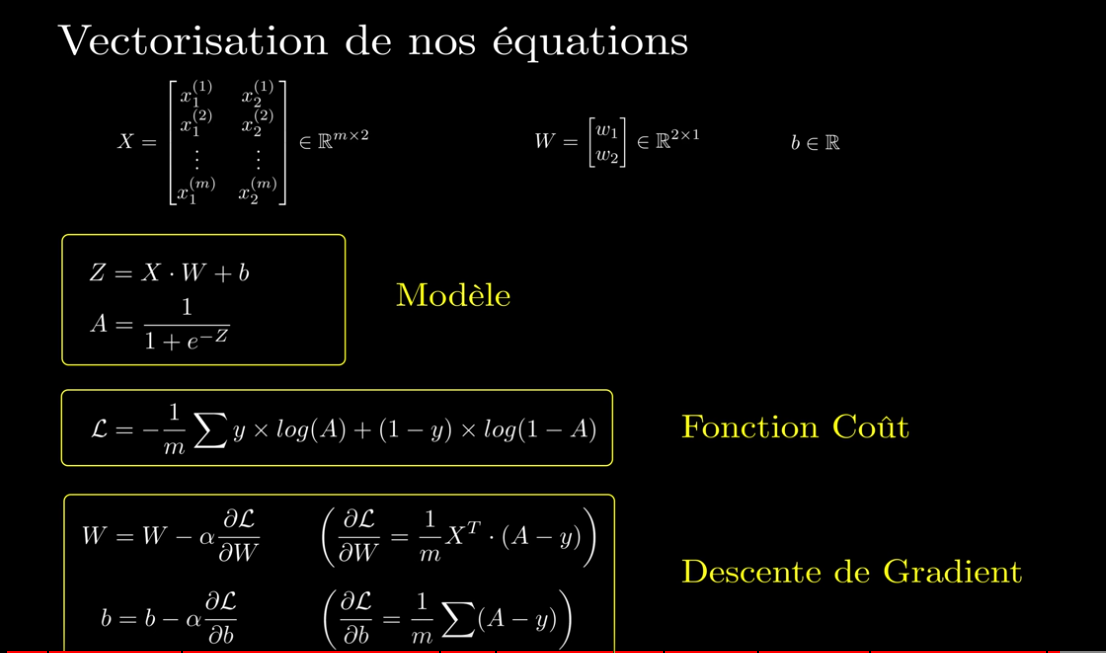

In [2]:
# perceptron à 2 variables d'entrée et 100 observations
n_variables=2
m = 100

In [3]:
X, y = make_blobs(n_samples=m, n_features=n_variables, centers=2, random_state=0)

In [4]:
y = y.reshape((y.shape[0]), 1)

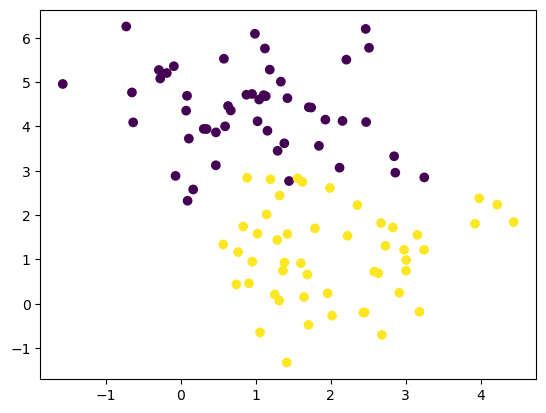

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [7]:
print(X[:10])

[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]
 [ 1.44193252  2.76754364]
 [ 1.0220286   4.11660348]
 [ 3.97820955  2.37817845]
 [ 0.58894326  4.00148458]
 [ 1.25185786  0.20811388]]


In [8]:
print(y[:10])

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]


In [9]:
# initialisation des valeurs de wi
W = np.random.random((n_variables,1))
W

array([[0.6888921 ],
       [0.46002132]])

In [10]:
# initilisation de b
b = np.random.random(1)
b

array([0.85122474])

In [177]:
def initialisation(X):
    W = np.random.random((X.shape[1],1))
    b = np.random.random(1)
    return W, b

In [119]:
def model(X, W, b):
    Z = X.dot(W) + b
    return Z

In [120]:
Z = model(X, W, b)
Z[:10]

array([[ 3.12830216],
       [ 4.6826164 ],
       [-7.32205409],
       [-0.43443914],
       [ 4.7736618 ],
       [-0.39878555],
       [-3.96329554],
       [ 2.58927399],
       [-4.03954185],
       [ 5.56329934]])

In [121]:
def sigmoide(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [122]:
A = sigmoide(Z)
A[:10]

array([[9.58045202e-01],
       [9.90830097e-01],
       [6.60367094e-04],
       [3.93066806e-01],
       [9.91621410e-01],
       [4.01604160e-01],
       [1.86461110e-02],
       [9.30168074e-01],
       [1.73009442e-02],
       [9.96178561e-01]])

In [123]:
A.shape

(100, 1)

In [124]:
def LogLoss(m, y, A):
    L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
    return L

In [125]:
LogLoss(m, y, A)

0.12131213409245571

In [126]:
def gradients(m, X, A, y):
    dL_dw = (1/m)*X.T.dot((A-y))
    dL_db = (1/m)*np.sum(A-y)
    return dL_dw, dL_db

In [127]:
dL_dw, dL_db = gradients(m, X, A, y)
dL_dw, dL_db

(array([[0.00092531],
        [0.00270999]]),
 -0.00918388576053237)

In [128]:
def gradient_descent(W, b, dL_dw, dL_db, alpha=0.05):
    W = W - alpha*dL_dw
    b = b - alpha*dL_db
    return W, b

In [129]:
W, b = gradient_descent(W, b, dL_dw, dL_db)
W, b

(array([[ 0.81121805],
        [-2.3898419 ]]),
 array([5.045502]))

In [182]:
def predict(X, W, b):
    y_pred = sigmoide(X.dot(W)+b).round().astype('int')
    return y_pred

In [331]:
def artificial_neuron(X, y, alpha=0.05, n_iter=1000):
    W, b = initialisation(X)
    Loss = []
    accuracy = []
    m = len(y)
    
    for i in tqdm(range(n_iter)):
        Z = model(X, W, b)
        A = sigmoide(Z)
        dL_dw, dL_db = gradients(m, X, A, y)
        W, b = gradient_descent(W, b, dL_dw, dL_db, alpha)
        
        if i%10==0:
            L = LogLoss(m, y, A)
            Loss.append(L)

            y_pred = predict(X, W, b)
            accuracy.append(accuracy_score(y, y_pred))
        
    print('accuracy_score final :', accuracy_score(y, y_pred))
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.title("Evolution LogLoss")
    plt.plot(Loss)
    plt.ylabel('LogLoss')
    plt.xlabel('Itération')
    
    plt.subplot(1,2,2)
    plt.title("Evolution Accuracy")
    plt.plot(accuracy)
    
    plt.show()
    
    return W, b

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12549.83it/s]


accuracy_score final : 0.92


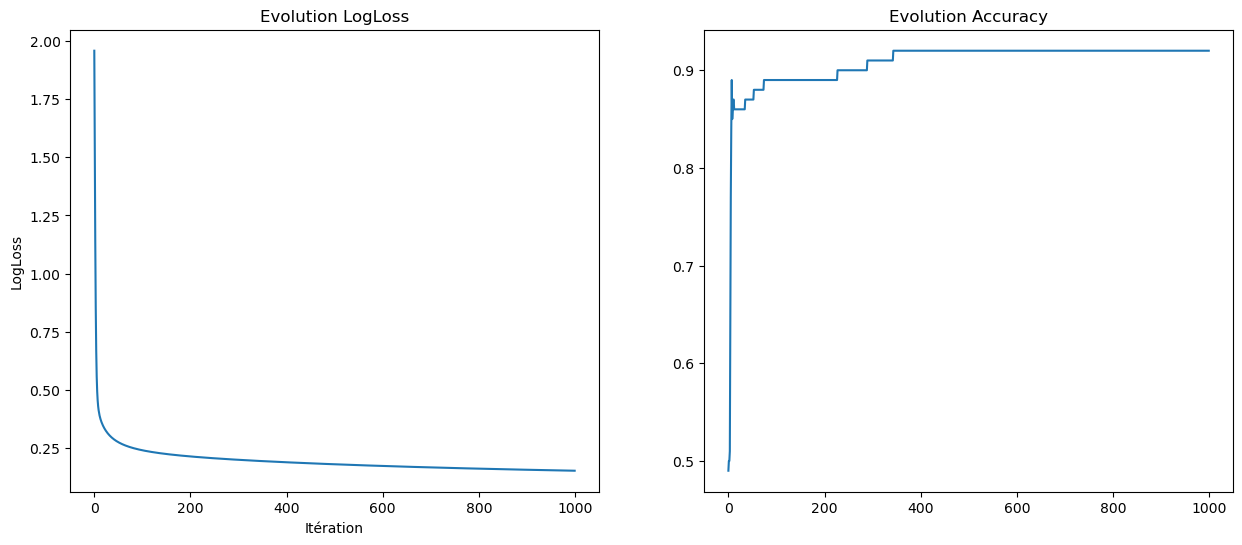

In [332]:
W, b = artificial_neuron(X, y, alpha=0.01, n_iter=10000)

In [263]:
df = pd.DataFrame()

In [264]:
df['y'] = y.reshape((100,))
df[['x1', 'x2']] = X
df['y_pred'] = sigmoide(X.dot(W)+b).round().astype('int')
df

,y,x1,x2,y_pred
0,1,4.218503,2.234192,1
1,1,0.907799,0.459844,1
2,0,-0.276525,5.081278,0
3,0,0.088484,2.322991,0
4,1,3.243297,1.214606,1
...,...,...,...,...
95,0,-1.576720,4.957406,0
96,1,1.411649,-1.325739,1
97,1,3.004688,0.985215,1
98,0,-0.637628,4.091047,0


In [265]:
x1 = np.linspace(-2,5,100)
x2 = (-W[0]*x1 - b)/W[1]

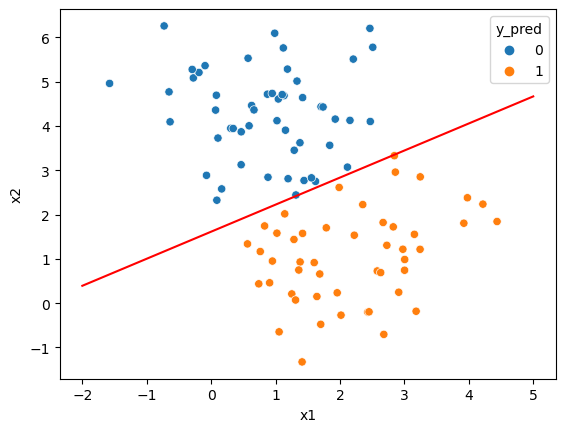

In [266]:
sns.scatterplot(data=df, x='x1', y='x2', hue='y_pred')
plt.plot(x1, x2, c='r')

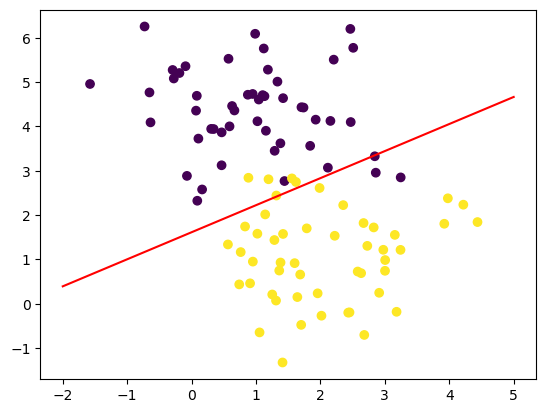

In [267]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1, x2, c='r')

In [268]:
df

,y,x1,x2,y_pred
0,1,4.218503,2.234192,1
1,1,0.907799,0.459844,1
2,0,-0.276525,5.081278,0
3,0,0.088484,2.322991,0
4,1,3.243297,1.214606,1
...,...,...,...,...
95,0,-1.576720,4.957406,0
96,1,1.411649,-1.325739,1
97,1,3.004688,0.985215,1
98,0,-0.637628,4.091047,0


In [269]:
confusion_matrix = pd.crosstab(df['y_pred'], df['y'])
confusion_matrix.columns = ['Classe 0', 'Classe 1']
confusion_matrix.index = ['Prédit Classe 0', 'Prédit Classe 1']
confusion_matrix

,Classe 0,Classe 1
Prédit Classe 0,47,5
Prédit Classe 1,3,45


In [270]:
# Précision : TP / (TP + FP)
# mesure des faux positifs par rapport aux vrais positifs
precision = confusion_matrix.loc['Prédit Classe 1', 'Classe 1']/((confusion_matrix.loc['Prédit Classe 1', 'Classe 1'])+(confusion_matrix.loc['Prédit Classe 1', 'Classe 0']))
precision

0.9375

In [271]:
# Recall ou sensibilité : TP / (TP + FN)
# mesure des faux négatifs par rapport aux vrais positifs
recall = confusion_matrix.loc['Prédit Classe 1', 'Classe 1']/((confusion_matrix.loc['Prédit Classe 1', 'Classe 1'])+(confusion_matrix.loc['Prédit Classe 0', 'Classe 1']))
recall

0.9

In [272]:
# Spécificité : TN / (FP + TN)
# mesure des faux positifs par rapport aux vrais négatifs
specificite = confusion_matrix.loc['Prédit Classe 0', 'Classe 0']/((confusion_matrix.loc['Prédit Classe 0', 'Classe 0'])+(confusion_matrix.loc['Prédit Classe 1', 'Classe 0']))
specificite

0.94

In [273]:
# F1 score = 2*(precision * recall) / (precision + recall)
f1_score = 2*(precision * recall) / (precision + recall)
f1_score

0.9183673469387755

# Exercice Chien Chat

In [274]:
import h5py
import utilities

In [275]:
X_train, y_train, X_test, y_test = utilities.load_data()

In [276]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


In [277]:
X_train.shape[0]

1000

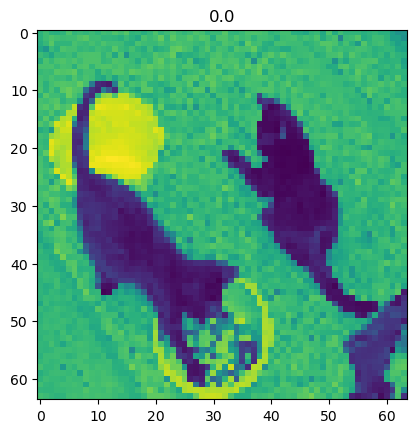

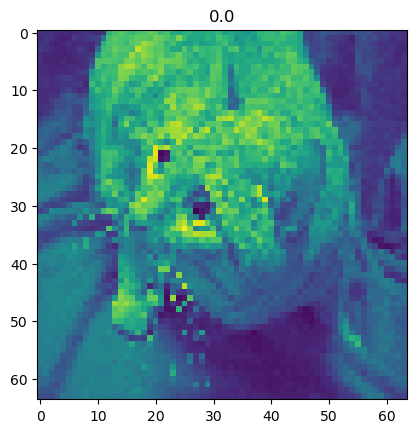

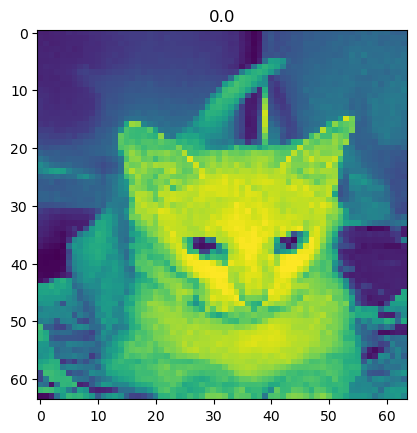

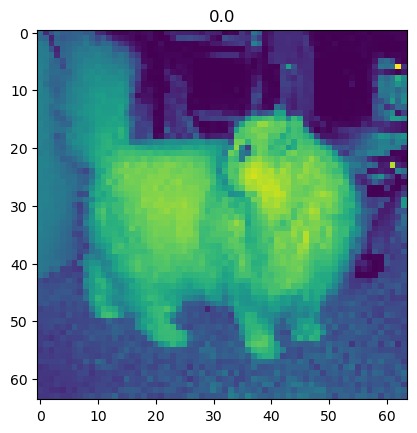

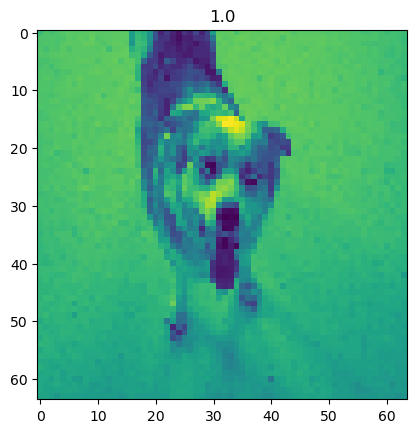

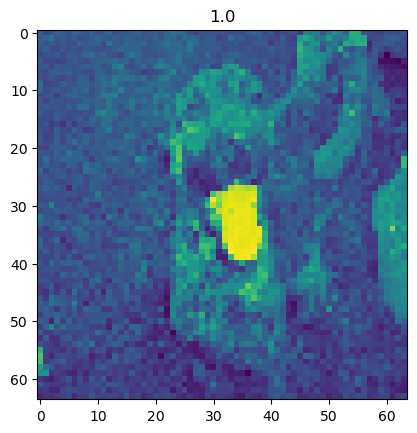

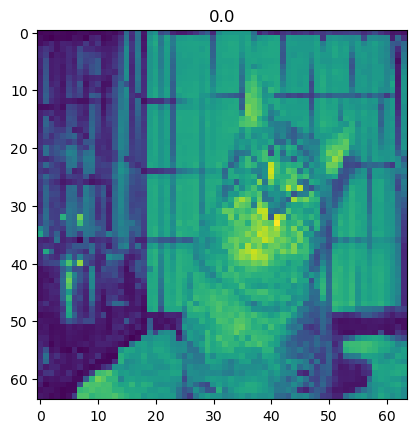

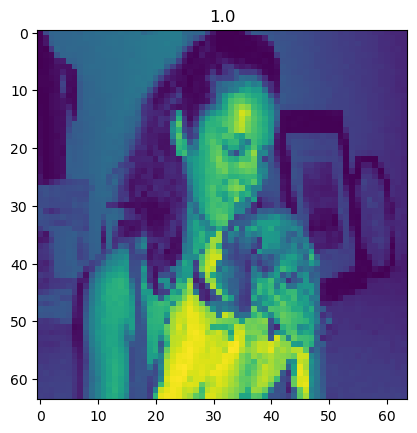

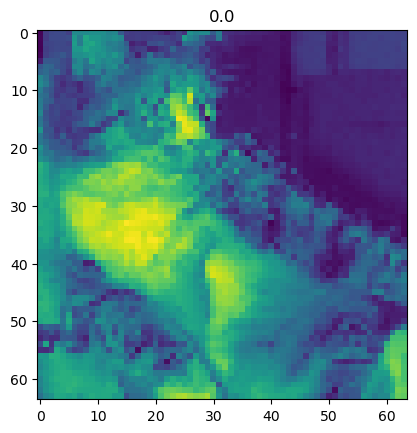

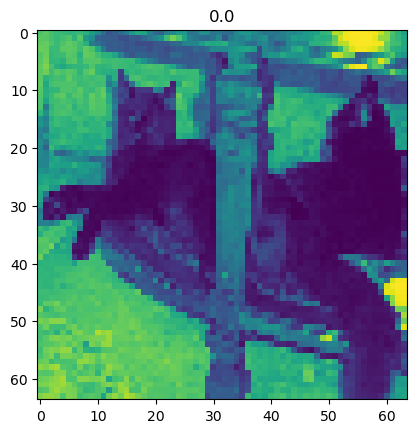

In [278]:
n=10
for i in range(n):
    plt.title(y_train[i,0])
    plt.imshow(X_train[i])
    plt.show()

In [325]:
# standardisation entre 0 et 1
X_train_scaler = X_train/255
X_test_scaler = X_test/255

In [326]:
# vectorisation des images
X_train_scaler = X_train_scaler.reshape(X_train_scaler.shape[0], X_train_scaler.shape[1]*X_train_scaler.shape[2])
X_test_scaler = X_test_scaler.reshape(X_test_scaler.shape[0], X_test_scaler.shape[1]*X_test_scaler.shape[2])

In [327]:
print(X_train_scaler.shape)
print(X_test_scaler.shape)

(1000, 4096)
(200, 4096)


  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

  2%|█▌                                                                           | 209/10000 [00:00<00:43, 226.38it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:41<00:00, 242.50it/s]


accuracy_score final : 0.89


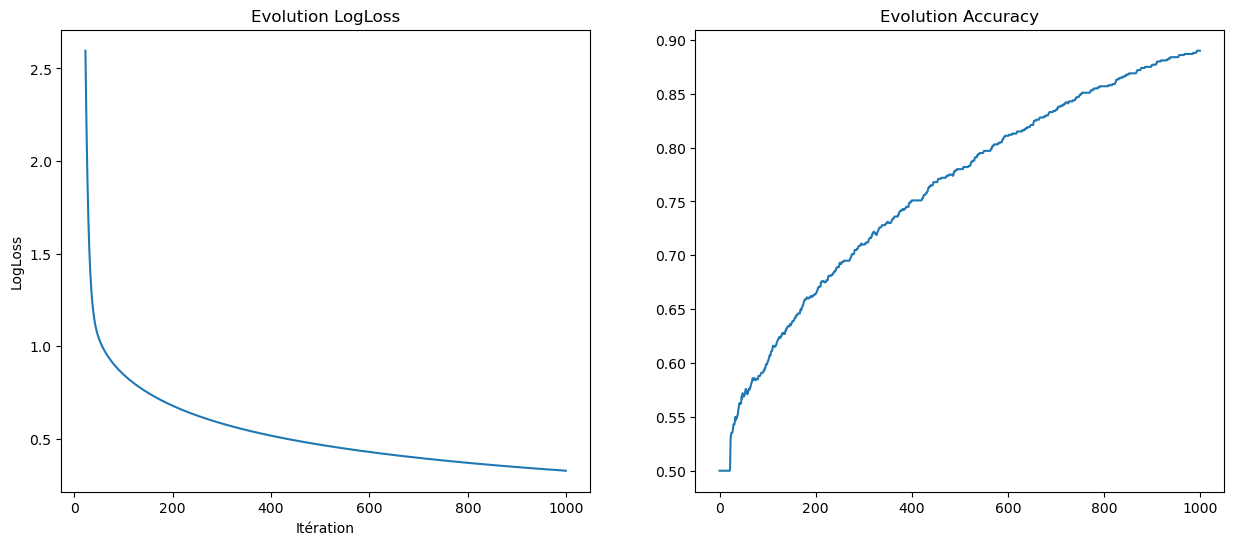

In [334]:
# entrainement du modele
W, b = artificial_neuron(X=X_train_scaler, y=y_train, alpha=0.01, n_iter=10000)

In [335]:
# score du modèle sur le jeu de test
y_pred = predict(X=X_test_scaler, W=W, b=b)
accuracy_score(y_test, y_pred)

0.475

In [322]:
# matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=np.unique(y_test))
disp.plot()

plt.show()

TypeError: 'DataFrame' object is not callable

In [304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.53      0.51       100
         1.0       0.50      0.47      0.48       100

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

  0%|▎                                                                             | 44/10000 [00:00<00:23, 427.43it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

  1%|▋                                                                             | 89/10000 [00:00<00:22, 438.15it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
  1%|█▏                                                                           | 149/10000 [00:00<00:19, 502.38it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

  2%|█▌                                                                           | 200/10000 [00:00<00:19, 503.51it/s]C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: invalid value encountered in multiply
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\Users\Raphaël\AppData\Local\Temp\ipykernel_14548\3892846390.py:2: RuntimeWarning: divide by zero encountered in log
  L = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
C:\

accuracy_score final : 1.0


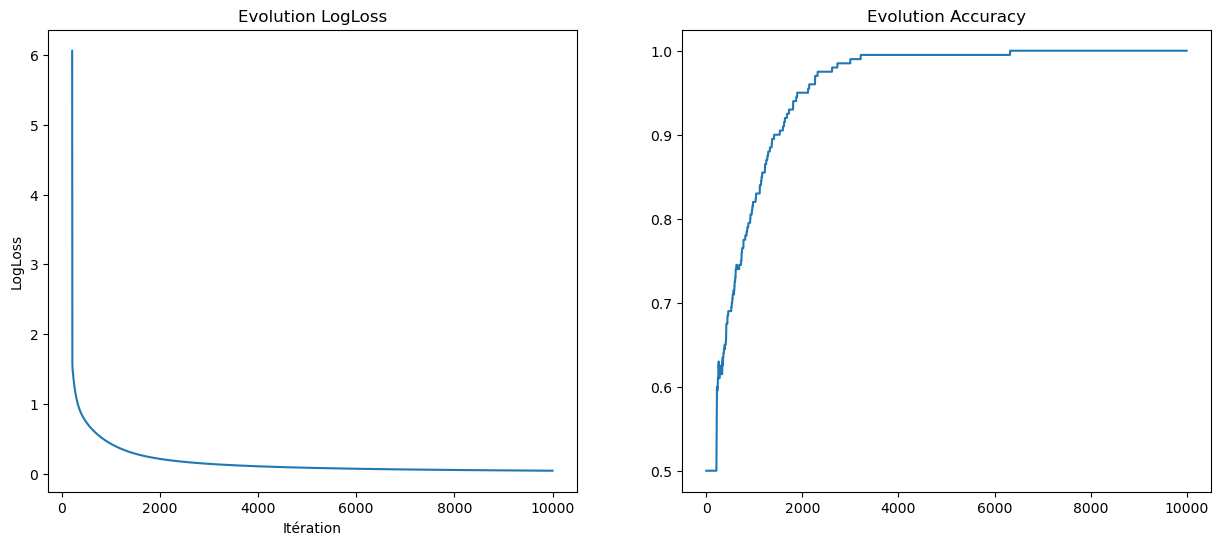

In [290]:
# entrainement du modele
W, b = artificial_neuron(X=X_test_scaler, y=y_test, alpha=0.01, n_iter=10000)